In [1]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
def print_metrics(y_true, y_pred):
    print(f'R^2 {r2_score(y_true, y_pred)}')
    print(f'MSE {mean_squared_error(y_true, y_pred)}')
    print(f'RMSE {mean_squared_error(y_true, y_pred, squared=False)}')
    print(f'MAE {mean_absolute_error(y_true, y_pred)}')

def plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.xlabel(f'Предсказание модели')
    plt.ylabel('Истинные значения')
    plt.xlim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.ylim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    sns.scatterplot(y_train_pred, y_train, alpha=0.5, color='red')
    sns.scatterplot(y_test_pred, y_test, alpha=0.5, color='blue')
    plt.title('Истинные значения vs предсказанных')

### Linear model

R^2 0.9756766320610651
MSE 251.69510395578652
RMSE 15.864901637129256
MAE 12.513930021587349
Wall time: 3.87 s


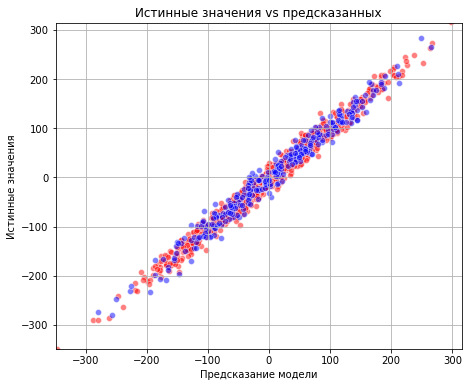

In [3]:
%%time
# Искусственный набор данных
data = datasets.make_regression(
    n_samples=1000,
    n_features=15,
    n_informative=2,
    n_targets=1,
    noise=14.3,
    random_state=7
)
X = data[0]
y = data[1]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

import sys
sys.path.append('../modules')
from LinearRegressor import LinearRegressor
model = LinearRegressor()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_metrics(y_test, y_test_pred)
plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred)

R^2 0.6743334990089345
MSE 32.96255366270402
RMSE 5.741302436094446
MAE 3.660934291753075
Wall time: 736 ms


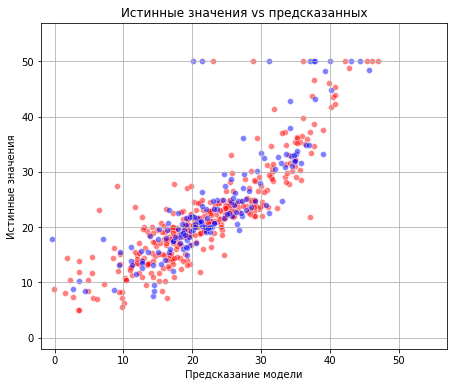

In [4]:
%%time
# Набор данных о ценах на жилье в Бостоне
boston = datasets.load_boston()
X = boston.data
y = boston.target
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

model = LinearRegressor()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_metrics(y_test, y_test_pred)
plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred)

### Elastic Net

Wall time: 0 ns
R^2 0.9801724785329079
MSE 235.14731239921696
RMSE 15.334513764681844
MAE 12.387586692742364


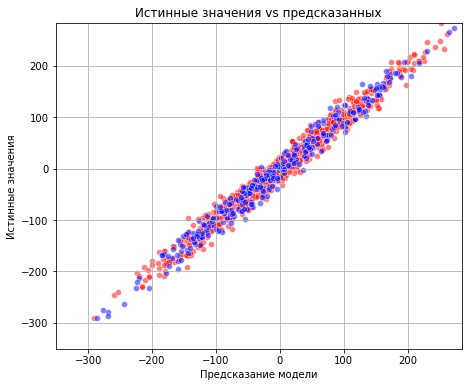

In [5]:
%time
# Искусственный набор данных
data = datasets.make_regression(
    n_samples=1000,
    n_features=15,
    n_informative=2,
    n_targets=1,
    noise=14.3,
    random_state=7
)
X = data[0]
y = data[1]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from ElasticNetRegressor import ElasticNetRegressor
model = ElasticNetRegressor(alpha=0.5, l1_ratio=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_metrics(y_test, y_test_pred)
plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred)

In [6]:
%%time
# Набор данных о ценах на жилье в Бостоне
boston = datasets.load_boston()
X = boston.data
y = boston.target
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

model = ElasticNetRegressor(alpha=0.4, l1_ratio=0.6)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_metrics(y_test, y_test_pred)
plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred)


R^2 0.4182725832848919
MSE 44.997151484481634
RMSE 6.707991613328212
MAE 5.165685311447092
Wall time: 2.25 s
